In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
record=pd.read_excel('bigcontest_record_train.xlsx',header=1)
rate=pd.read_excel('bigcontest_rate_train.xlsx',header=1)

In [19]:
record.columns=['date','min','mc','pc','product','category','price','total_price']
#데이터 이름 변경

In [21]:
record['category'].unique()
#상품군 종류

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '무형',
       '가구', '침구'], dtype=object)

In [29]:
record.groupby(record['category']).count().iloc[:,-1]
#카테고리별 데이터 수

category
가구      2614
가전      6479
건강기능     790
농수축     3884
무형         0
생활용품    2877
속옷      3919
의류      4340
이미용     1305
잡화      3891
주방      6604
침구       669
Name: total_price, dtype: int64

In [34]:
record.describe()

,min,mc,pc,price,total_price
count,21525.000000,38309.000000,38309.000000,3.830900e+04,3.737200e+04
mean,20.174664,100390.972148,201219.923334,4.565537e+05,2.187305e+07
std,3.633757,249.927870,735.677344,7.260555e+05,2.019140e+07
min,2.466667,100000.000000,200000.000000,0.000000e+00,5.000000e+04
25%,20.000000,100155.000000,200550.000000,5.900000e+04,6.880750e+06
50%,20.000000,100346.000000,201167.000000,1.090000e+05,1.612950e+07
75%,20.000000,100596.000000,201863.000000,4.990000e+05,3.163125e+07
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [32]:
record['product'].unique().shape
#판매한 상품 개수

(1770,)

In [7]:
record.isnull().sum()
#결측치

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액        937
dtype: int64

In [146]:
record.iloc[215:218,:]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
215,2019-01-03 17:00:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,16350000.0
216,2019-01-03 17:20:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,33015000.0
217,2019-01-03 17:40:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,27284000.0


In [8]:
rate.isnull().sum()

시간대                         0
2019-01-01                  0
2019-01-02                  0
2019-01-03                  0
2019-01-04                  0
                           ..
2019-12-28                  0
2019-12-29                  0
2019-12-30                  0
2019-12-31                  0
2019-01-01 to 2019-12-31    0
Length: 367, dtype: int64

In [7]:
rate.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [11]:
rate.columns

Index(['시간대', '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
       '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
       ...
       '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
       '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31',
       '2019-01-01 to 2019-12-31'],
      dtype='object', length=367)

In [30]:
a=rate.iloc[240:261,0:2] #6시부터6시20분
b=rate.iloc[260:281,0:2] #6시20분부터6시40분

In [55]:
a

,시간대,2019-01-01
240,06:00,0.0
241,06:01,0.0
242,06:02,0.0
243,06:03,0.0
244,06:04,0.0
245,06:05,0.0
246,06:06,0.0
247,06:07,0.0
248,06:08,0.0
249,06:09,0.0


In [33]:
rate.describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.003681,0.005564,0.001731,0.002658,0.002079,0.002858,0.002703,0.002152,0.002730,0.001947,...,0.010427,0.006006,0.006026,0.006806,0.003879,0.006118,0.004477,0.004576,0.004910,0.004297
std,0.008067,0.012898,0.006213,0.008908,0.007124,0.008478,0.006594,0.006987,0.008164,0.008277,...,0.015119,0.012908,0.012975,0.013342,0.009357,0.012180,0.010604,0.010783,0.013289,0.001512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000
75%,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.012000,0.002000,0.010000,0.000000,0.007000,0.000000,0.000000,0.000000,0.005000
max,0.069000,0.073000,0.073000,0.059000,0.070000,0.081000,0.039000,0.078000,0.049000,0.089000,...,0.077000,0.118000,0.095000,0.108000,0.080000,0.093000,0.075000,0.069000,0.108000,0.008000


In [62]:
mean=rate.describe().iloc[1,:] #1일 평균 시청률
mean

2019-01-01                  0.003681
2019-01-02                  0.005564
2019-01-03                  0.001731
2019-01-04                  0.002658
2019-01-05                  0.002079
                              ...   
2019-12-28                  0.006118
2019-12-29                  0.004477
2019-12-30                  0.004576
2019-12-31                  0.004910
2019-01-01 to 2019-12-31    0.004297
Name: mean, Length: 366, dtype: float64

In [63]:
rate.iloc[-1,:]

시간대                         월화수목금토일02:00-01:59
2019-01-01                               0.004
2019-01-02                               0.006
2019-01-03                               0.002
2019-01-04                               0.003
                                   ...        
2019-12-28                               0.006
2019-12-29                               0.004
2019-12-30                               0.005
2019-12-31                               0.005
2019-01-01 to 2019-12-31                 0.004
Name: 1440, Length: 367, dtype: object

In [4]:
#1월 1일부터 12월 31일까지 1분당 평균 시청률
rate_per_min_avg=rate.iloc[:-1,-1]

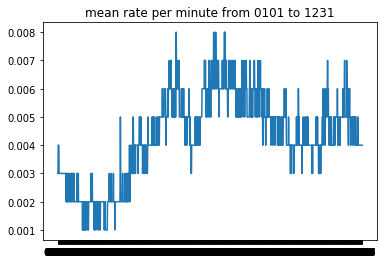

In [72]:
plt.plot(rate.iloc[:-1,0],rate_per_min_avg)
plt.title('mean rate per minute from 0101 to 1231')
plt.show()

In [6]:
rate_per_min_avg.argmax()

559

In [77]:
len(record['방송일시'])

38309

In [80]:
len(set(record['마더코드']))

716

In [122]:
list(set(record['상품군']))

['건강기능', '이미용', '속옷', '생활용품', '주방', '침구', '잡화', '가전', '무형', '가구', '의류', '농수축']

In [123]:
list(set(record['노출(분)']))

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 16.016666666666666,
 16.0,
 16.516666666666666,
 nan,
 20.0,
 nan,
 nan,
 nan,
 nan,
 25.0,
 nan,
 nan,
 22.0,
 23.0,
 30.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 60.0,
 12.0,
 12.5,
 13.0,
 13.5,
 15.0,
 15.5,
 15.25,
 nan,
 nan,
 3.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


In [126]:
clothing=record['상품군']=='의류'
record[clothing]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38226,2019-12-31 10:40:00,20.0,100269,200885,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,의류,299000,59435000.0
38227,2019-12-31 11:00:00,20.0,100269,200885,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,의류,299000,84192000.0
38259,2019-12-31 18:20:00,20.0,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,31983000.0
38260,2019-12-31 18:40:00,20.0,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,39434000.0


In [129]:
nannon=record['노출(분)']!=20
nannon_min=record[nannon]['노출(분)']

In [35]:
rate.describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.003681,0.005564,0.001731,0.002658,0.002079,0.002858,0.002703,0.002152,0.002730,0.001947,...,0.010427,0.006006,0.006026,0.006806,0.003879,0.006118,0.004477,0.004576,0.004910,0.004297
std,0.008067,0.012898,0.006213,0.008908,0.007124,0.008478,0.006594,0.006987,0.008164,0.008277,...,0.015119,0.012908,0.012975,0.013342,0.009357,0.012180,0.010604,0.010783,0.013289,0.001512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000
75%,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.012000,0.002000,0.010000,0.000000,0.007000,0.000000,0.000000,0.000000,0.005000
max,0.069000,0.073000,0.073000,0.059000,0.070000,0.081000,0.039000,0.078000,0.049000,0.089000,...,0.077000,0.118000,0.095000,0.108000,0.080000,0.093000,0.075000,0.069000,0.108000,0.008000


In [37]:
rate.info

<bound method DataFrame.info of                      시간대  2019-01-01  2019-01-02  2019-01-03  2019-01-04  \
0                  02:00       0.000       0.000       0.000       0.000   
1                  02:01       0.000       0.000       0.000       0.000   
2                  02:02       0.000       0.000       0.000       0.000   
3                  02:03       0.000       0.000       0.014       0.000   
4                  02:04       0.000       0.000       0.000       0.000   
...                  ...         ...         ...         ...         ...   
1436               01:56       0.000       0.000       0.000       0.000   
1437               01:57       0.000       0.000       0.000       0.000   
1438               01:58       0.000       0.000       0.000       0.000   
1439               01:59       0.000       0.000       0.000       0.000   
1440  월화수목금토일02:00-01:59       0.004       0.006       0.002       0.003   

      2019-01-05  2019-01-06  2019-01-07  2019-01-08  2

In [39]:
for p in record['product']:
    p=p.strip(' ')

In [46]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         38309 non-null  datetime64[ns]
 1   min          21525 non-null  float64       
 2   mc           38309 non-null  int64         
 3   pc           38309 non-null  int64         
 4   product      38309 non-null  object        
 5   category     38309 non-null  object        
 6   price        38309 non-null  int64         
 7   total_price  37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [51]:
record['day_name']=record['date'].dt.day_name()

In [53]:
record.head()

,date,min,mc,pc,product,category,price,total_price,day_name
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,Tuesday
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,Tuesday
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,Tuesday


In [61]:
rg=record['total_price'].groupby(record['date'].dt.date).sum()

In [62]:
rg

date
2019-01-01    2.712779e+09
2019-01-02    2.011323e+09
2019-01-03    2.062243e+09
2019-01-04    2.049444e+09
2019-01-05    2.588590e+09
                  ...     
2019-12-28    2.707108e+09
2019-12-29    2.706856e+09
2019-12-30    2.224920e+09
2019-12-31    2.313063e+09
2020-01-01    2.156940e+08
Name: total_price, Length: 366, dtype: float64

In [63]:
rg.mean()

2233442038.251366